In [144]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import quantstats as qs
from scipy.stats import norm
import cvxpy as cp
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline


In [145]:
assets = ['ADBE', 'AMD','AMZN','AAPL','GOOG','META','MSFT', 'NFLX','NVDA','TSLA']

In [146]:
assets.sort()

In [147]:
start_date= '2020-07-05'
end_date= '2023-07-05'

In [148]:
n_assets=len(assets)

In [149]:
prices_df=pd.DataFrame()

prices_df= yf.download(assets, start=start_date, end=end_date)

[                       0%                       ]

[*********************100%***********************]  10 of 10 completed


In [150]:
prices_df.head().dropna()

Adj Close                                                \
                 AAPL        ADBE        AMD        AMZN       GOOG   
Date                                                                  
2020-07-06 9151.7334% 45258.9996% 5340.0002% 15285.2005% 7478.5004%   
2020-07-07 9123.3368% 44935.9985% 5293.0000% 15000.5997% 7425.9003%   
2020-07-08 9335.8192% 45767.9993% 5343.0000% 15405.5496% 7480.0003%   
2020-07-09 9375.9682% 46083.9996% 5725.9998% 15913.1500% 7554.9500%   
2020-07-10 9392.3676% 46620.0012% 5588.0001% 16000.0000% 7708.6998%   

                                                                        ...  \
                  META        MSFT        NFLX        NVDA        TSLA  ...   
Date                                                                    ...   
2020-07-06 24027.9999% 20416.0126% 49380.9998%  9811.2907%  9143.8667%  ...   
2020-07-07 24086.0001% 20178.6163% 49316.0004%  9843.6966%  9265.7333%  ...   
2020-07-08 24358.0002% 20622.3999% 50277.9999% 10186.9698%  9105.8670%  ...   
2020-07-09 24450.0000% 20766.7740% 50776.0010% 10479.1351%  9295.2003%  ...   
2020-07-10 24507.0007% 20703.7903% 54872.9980% 10449.4720% 10297.6669%  ...   

               Volume                                                    \
                 AAPL     ADBE       AMD       AMZN      GOOG      META   
Date                                                                      
2020-07-06  118655600  2761200  36769400  137612000  31280000  26206200   
2020-07-07  112424400  2684600  32153100  105150000  29164000  27887800   
2020-07-08  117092000  1999200  35608300  100752000  24994000  29791300   
2020-07-09  125642800  2269800  87216300  127774000  28466000  22174900   
2020-07-10   90257200  3676200  59839700  109720000  37126000  22982700   

                                                     
                MSFT      NFLX      NVDA       TSLA  
Date                                                 
2020-07-06  31897600   7839000  31589200  308548500  
2020-07-07  33600700   5669900  35780000  322345500  
2020-07-08  33600000   5691700  36548000  244669500  
2020-07-09  33121700   5840500  49454800  175764000  
2020-07-10  26177600  21605600  49767600  350064000  

[5 rows x 60 columns]

In [151]:
prices_df.tail().dropna()

Adj Close                                                  \
                  AAPL        ADBE         AMD        AMZN        GOOG   
Date                                                                     
2023-06-27 18755.9280% 48926.9989% 11038.9999% 12917.9993% 11901.0002%   
2023-06-28 18874.6124% 48242.9993% 11016.9998% 12903.9993% 12108.0002%   
2023-06-29 18908.5205% 48376.9989% 11123.9998% 12790.0002% 12001.0002%   
2023-06-30 19345.3552% 48898.9990% 11391.0004% 13036.0001% 12097.0001%   
2023-07-03 19194.7586% 48520.9991% 11582.0000% 13022.0001% 12055.9998%   

                                                                        ...  \
                  META        MSFT        NFLX        NVDA        TSLA  ...   
Date                                                                    ...   
2023-06-27 28704.9988% 33318.6890% 41707.9987% 41868.8721% 25021.0007%  ...   
2023-06-28 28529.0009% 33446.1609% 42983.9996% 41110.0006% 25623.9990%  ...   
2023-06-29 28152.9999% 33366.4886% 42823.9990% 40815.0482% 25750.0000%  ...   
2023-06-30 28698.0011% 33913.2202% 44048.9990% 42294.7937% 26176.9989%  ...   
2023-07-03 28601.9989% 33659.2743% 44144.0002% 42405.7770% 27982.0007%  ...   

              Volume                                                   \
                AAPL     ADBE       AMD      AMZN      GOOG      META   
Date                                                                    
2023-06-27  50730800  2691700  59381600  46801000  27221700  26108300   
2023-06-28  51216800  3229200  67534100  52149500  19753100  16722100   
2023-06-29  46347300  1905400  58347200  40761000  18517500  15395700   
2023-06-30  85069600  3095900  53331900  54310500  23865800  19676000   
2023-07-03  31458200  1491000  31860000  28264800  13888300   8629300   

                                                    
                MSFT     NFLX      NVDA       TSLA  
Date                                                
2023-06-27  24354100  4818100  46217500  164968200  
2023-06-28  20259500  8811300  58263900  159770800  
2023-06-29  16997000  4932300  38051400  131283400  
2023-06-30  26823800  7342000  50053400  112267600  
2023-07-03  12508700  3733200  19820900  119685900  

[5 rows x 60 columns]

In [152]:
prices_df["Adj Close"].head().dropna()

,AAPL,ADBE,AMD,AMZN,GOOG,META,MSFT,NFLX,NVDA,TSLA
Date,,,,,,,,,,
2020-07-06,9151.7334%,45258.9996%,5340.0002%,15285.2005%,7478.5004%,24027.9999%,20416.0126%,49380.9998%,9811.2907%,9143.8667%
2020-07-07,9123.3368%,44935.9985%,5293.0000%,15000.5997%,7425.9003%,24086.0001%,20178.6163%,49316.0004%,9843.6966%,9265.7333%
2020-07-08,9335.8192%,45767.9993%,5343.0000%,15405.5496%,7480.0003%,24358.0002%,20622.3999%,50277.9999%,10186.9698%,9105.8670%
2020-07-09,9375.9682%,46083.9996%,5725.9998%,15913.1500%,7554.9500%,24450.0000%,20766.7740%,50776.0010%,10479.1351%,9295.2003%
2020-07-10,9392.3676%,46620.0012%,5588.0001%,16000.0000%,7708.6998%,24507.0007%,20703.7903%,54872.9980%,10449.4720%,10297.6669%


In [153]:
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()

In [154]:
prices_df['Adj Close'].iplot()

In [155]:
pd.options.display.float_format = '{:.4%}'.format

In [156]:
returns= prices_df['Adj Close'].pct_change().dropna()
returns

,AAPL,ADBE,AMD,AMZN,GOOG,META,MSFT,NFLX,NVDA,TSLA
Date,,,,,,,,,,
2020-07-07,-0.3103%,-0.7137%,-0.8802%,-1.8619%,-0.7034%,0.2414%,-1.1628%,-0.1316%,0.3303%,1.3328%
2020-07-08,2.3290%,1.8515%,0.9446%,2.6996%,0.7285%,1.1293%,2.1993%,1.9507%,3.4872%,-1.7254%
2020-07-09,0.4301%,0.6904%,7.1683%,3.2949%,1.0020%,0.3777%,0.7001%,0.9905%,2.8680%,2.0792%
2020-07-10,0.1749%,1.1631%,-2.4101%,0.5458%,2.0351%,0.2331%,-0.3033%,8.0688%,-0.2831%,10.7848%
2020-07-13,-0.4613%,-5.0901%,-4.0981%,-3.0000%,-1.9718%,-2.4768%,-3.0889%,-4.2334%,-4.0747%,-3.0810%
...,...,...,...,...,...,...,...,...,...,...
2023-06-27,1.5059%,2.0354%,2.6788%,1.4529%,-0.0672%,3.0811%,1.8168%,0.2741%,3.0616%,3.8000%
2023-06-28,0.6328%,-1.3980%,-0.1993%,-0.1084%,1.7393%,-0.6131%,0.3826%,3.0594%,-1.8125%,2.4100%
2023-06-29,0.1796%,0.2778%,0.9712%,-0.8834%,-0.8837%,-1.3180%,-0.2382%,-0.3722%,-0.7175%,0.4917%


In [157]:
returns.iplot()

In [158]:
returns.describe()

,AAPL,ADBE,AMD,AMZN,GOOG,META,MSFT,NFLX,NVDA,TSLA
count,75300.0000%,75300.0000%,75300.0000%,75300.0000%,75300.0000%,75300.0000%,75300.0000%,75300.0000%,75300.0000%,75300.0000%
mean,0.1178%,0.0372%,0.1582%,0.0076%,0.0834%,0.0702%,0.0833%,0.0378%,0.2511%,0.2306%
std,1.9732%,2.3536%,3.3392%,2.4038%,2.0021%,3.0351%,1.8410%,3.1665%,3.3871%,4.0480%
min,-8.0061%,-16.7932%,-13.8688%,-14.0494%,-9.6350%,-26.3901%,-7.7156%,-35.1166%,-9.4726%,-21.0628%
25%,-0.9436%,-1.1429%,-1.8948%,-1.3119%,-0.9663%,-1.2340%,-0.9155%,-1.4359%,-1.5974%,-2.0212%
50%,0.0748%,0.0890%,-0.0477%,0.0106%,0.0832%,0.0116%,0.0149%,0.0752%,0.2888%,0.2170%
75%,1.3192%,1.4251%,2.0718%,1.2732%,1.1434%,1.4739%,1.1995%,1.3898%,2.1712%,2.3880%
max,10.4688%,10.3992%,16.5016%,13.5359%,7.7460%,23.2824%,8.2268%,16.8543%,24.3696%,19.6412%


In [159]:
import riskfolio as rp

In [160]:
port=rp.Portfolio(returns=returns)

In [161]:
method_mu='hist'
method_cov='hist'
hist= True
model='Classic'
rm='MV'
obj='Sharpe'
rf=0
l=0

In [162]:
port.assets_stats(method_mu='hist', method_cov='hist', d=0.94)

In [163]:
w_rp=port.rp_optimization(model="Classic", rm="MV", hist=True, rf=0, b=None)

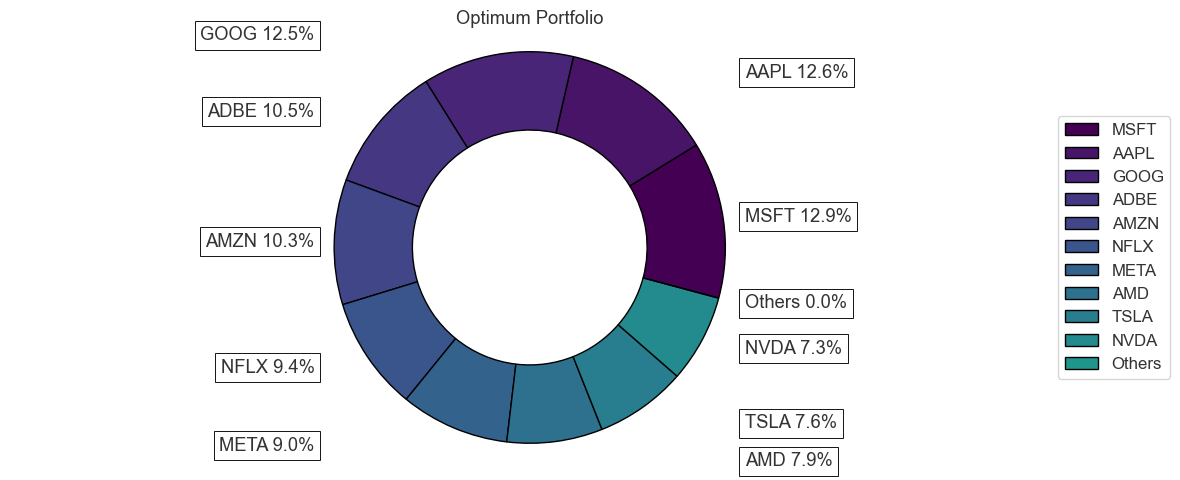

In [164]:
ax=rp.plot_pie(w=w_rp, title="Optimum Portfolio", cmap='viridis', height=5, width=12, ax=None)
plt.show()

In [165]:
points = 100 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AAPL,ADBE,AMD,AMZN,GOOG,META,MSFT,NFLX,NVDA,TSLA
0,31.1974%,0.0000%,0.0000%,0.0000%,22.9357%,0.0000%,43.0326%,2.8342%,0.0000%,0.0000%
1,43.2060%,0.0000%,0.0000%,0.0000%,20.6990%,0.0000%,34.4384%,0.0000%,0.0000%,1.6566%
2,44.8635%,0.0000%,0.0000%,0.0000%,19.7589%,0.0000%,31.5958%,0.0000%,0.5231%,3.2587%
3,45.3388%,0.0000%,0.0000%,0.0000%,19.2260%,0.0000%,29.6875%,0.0000%,2.1374%,3.6104%
4,45.7877%,0.0000%,0.0000%,0.0000%,18.7271%,0.0000%,27.8906%,0.0000%,3.6562%,3.9384%


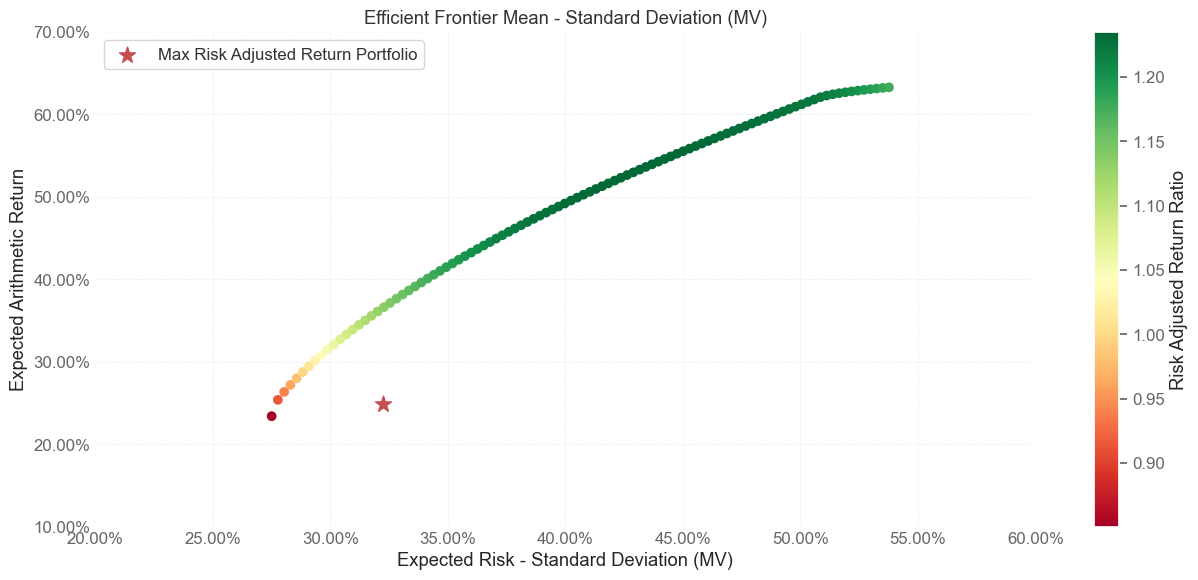

In [166]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='RdYlGn', w=w_rp, label=label,
                      marker='*', s=12, c='r', height=6, width=13, ax=None)

In [167]:
frontier

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
AAPL,31.1974%,43.2060%,44.8635%,45.3388%,45.7877%,46.2172%,46.6265%,47.0148%,47.3979%,47.7644%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
ADBE,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
AMD,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
AMZN,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
GOOG,22.9357%,20.6990%,19.7589%,19.2260%,18.7271%,18.2532%,17.8013%,17.3643%,16.9515%,16.5469%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
META,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
MSFT,43.0326%,34.4384%,31.5958%,29.6875%,27.8906%,26.1857%,24.5596%,23.0076%,21.4979%,20.0476%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
NFLX,2.8342%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
NVDA,0.0000%,0.0000%,0.5231%,2.1374%,3.6562%,5.0938%,6.4650%,7.7801%,9.0455%,10.2691%,...,83.8373%,86.3264%,88.5174%,90.5000%,92.3264%,94.0302%,95.6347%,97.1566%,98.6085%,100.0000%
TSLA,0.0000%,1.6566%,3.2587%,3.6104%,3.9384%,4.2501%,4.5475%,4.8332%,5.1072%,5.3720%,...,16.1627%,13.6736%,11.4826%,9.5000%,7.6736%,5.9698%,4.3653%,2.8434%,1.3915%,0.0000%


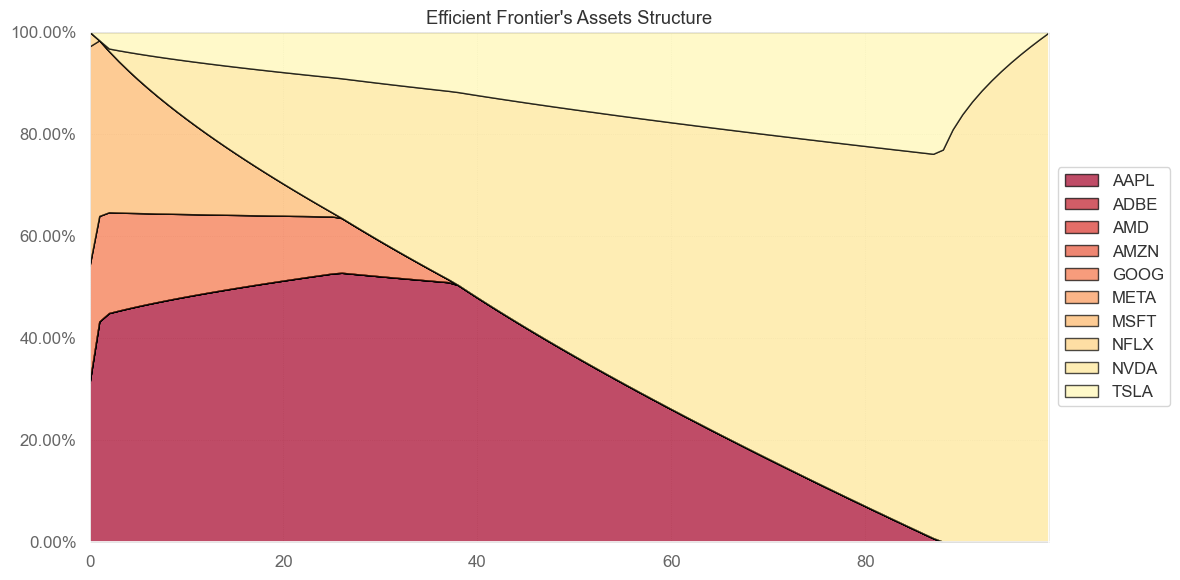

In [168]:
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="RdYlGn", height=6, width=12, ax=None)

In [169]:
#rm:Risk measure
rm='CVaR'
alpha=0.05
w_rp=port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
display(w_rp)

,weights
AAPL,0.0000%
ADBE,0.0000%
AMD,0.0000%
AMZN,0.0000%
GOOG,0.0000%
META,0.0000%
MSFT,0.0000%
NFLX,0.0000%
NVDA,85.4254%
TSLA,14.5746%


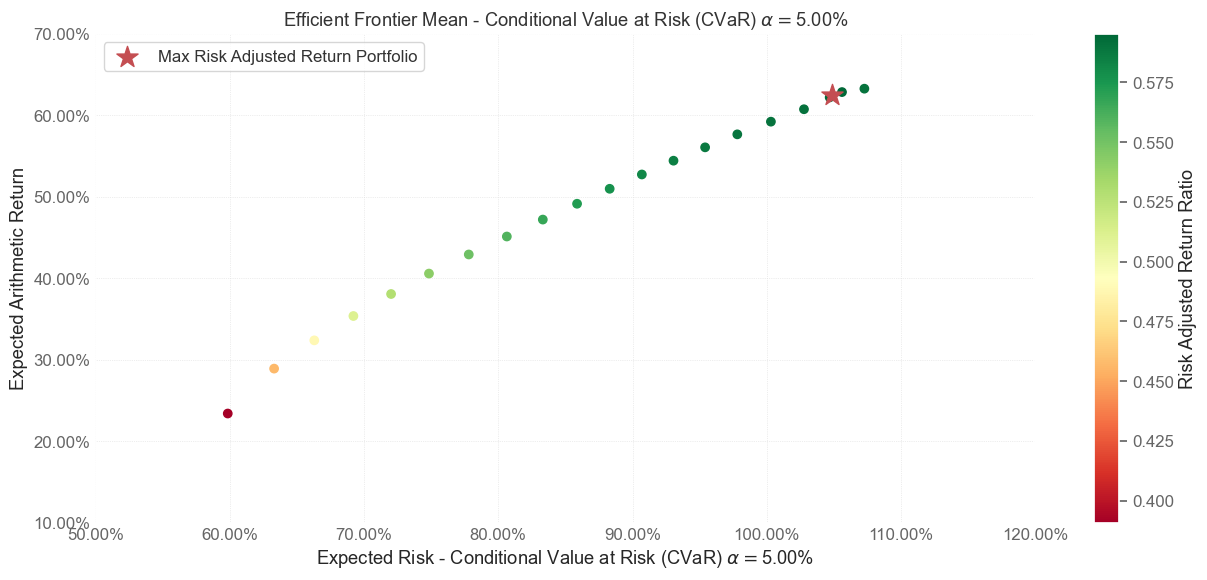

In [177]:
data = port.efficient_frontier(model='Classic', rm='MV', kelly=False, points=20, rf=0, solver='CLARABEL', hist=True)
data
#Plotting frontier This method that calculates the worst case mean variance portfolio according to the objective function and uncertainty sets selected by the user.
label='Max Risk Adjusted Return Portfolio'
ax=rp.plot_frontier(w_frontier=data, mu=mu, cov=cov, returns=returns, rm=rm, rf=rf, alpha=alpha, cmap='RdYlGn', w=w_rp, label=label, marker='*', s=16, c='r', height=6, width=13, ax=None)

In [ ]:
RiskFunctions.VaR_Hist(data, alpha=0.05)

In [ ]:
wc_optimization(obj='Sharpe', rf=0, l=2, Umu='box', Ucov='box')

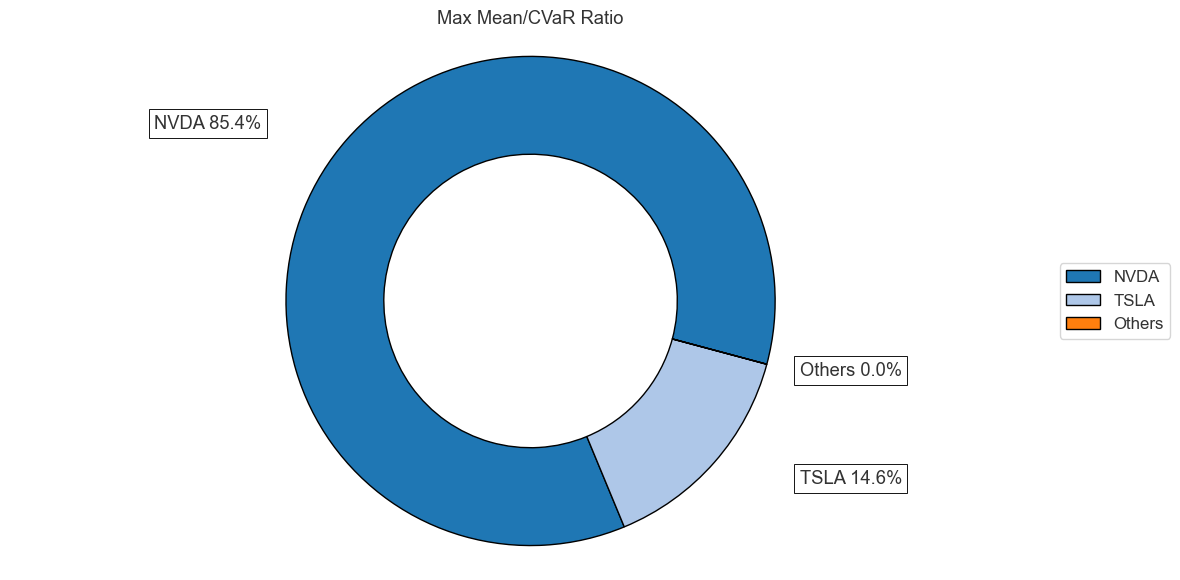

In [170]:
ax=rp.plot_pie(w=w_rp, title='Max Mean/CVaR Ratio', others= 0.05, nrow=25, cmap="tab20", height=6, width=12, ax=None)

In [171]:
#Number of points in the frontier
points=50
frontier=port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)
display(frontier.T.head())

,AAPL,ADBE,AMD,AMZN,GOOG,META,MSFT,NFLX,NVDA,TSLA
0,28.4675%,0.0000%,0.0000%,0.0000%,28.9740%,0.0000%,42.5585%,0.0000%,0.0000%,0.0000%
1,56.1132%,0.0000%,0.0000%,0.0000%,24.8806%,0.0000%,19.0062%,0.0000%,0.0000%,0.0000%
2,59.4134%,0.0000%,0.0000%,0.0000%,24.9277%,0.0000%,12.9253%,0.0000%,2.7335%,0.0000%
3,61.7730%,0.0000%,0.0000%,0.0000%,24.5428%,0.0000%,8.0652%,0.0000%,5.6191%,0.0000%
4,60.6332%,0.0000%,0.0000%,0.0000%,22.9087%,0.0000%,7.5756%,0.0000%,8.8825%,0.0000%


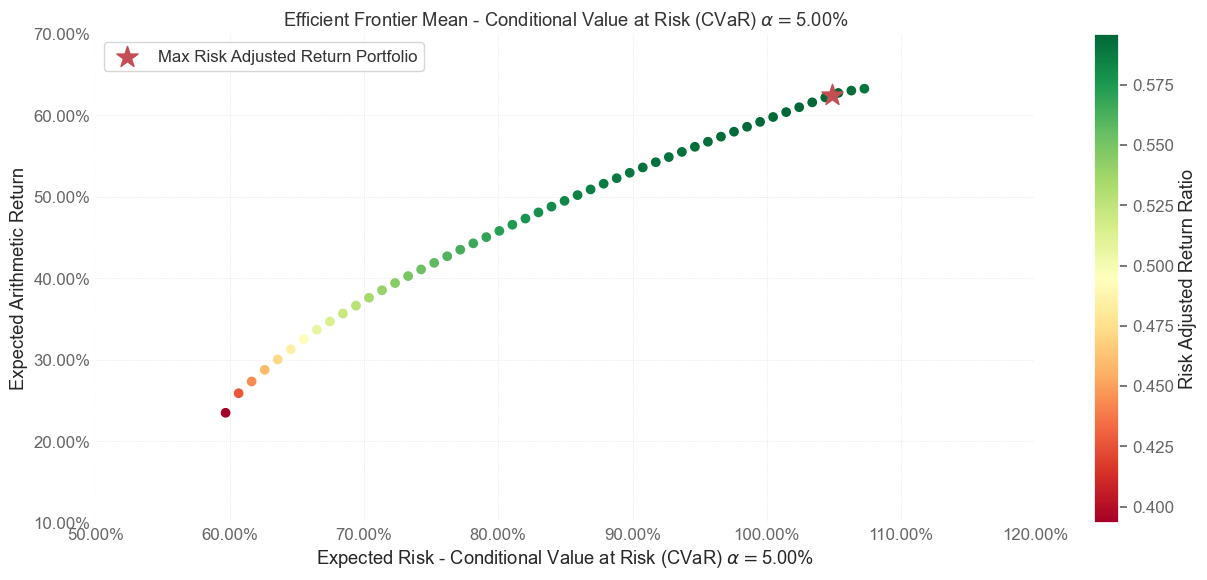

In [172]:
#Plotting frontier
label='Max Risk Adjusted Return Portfolio'
ax=rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm, rf=rf, alpha=alpha, cmap='RdYlGn', w=w_rp, label=label, marker='*', s=16, c='r', height=6, width=13, ax=None)

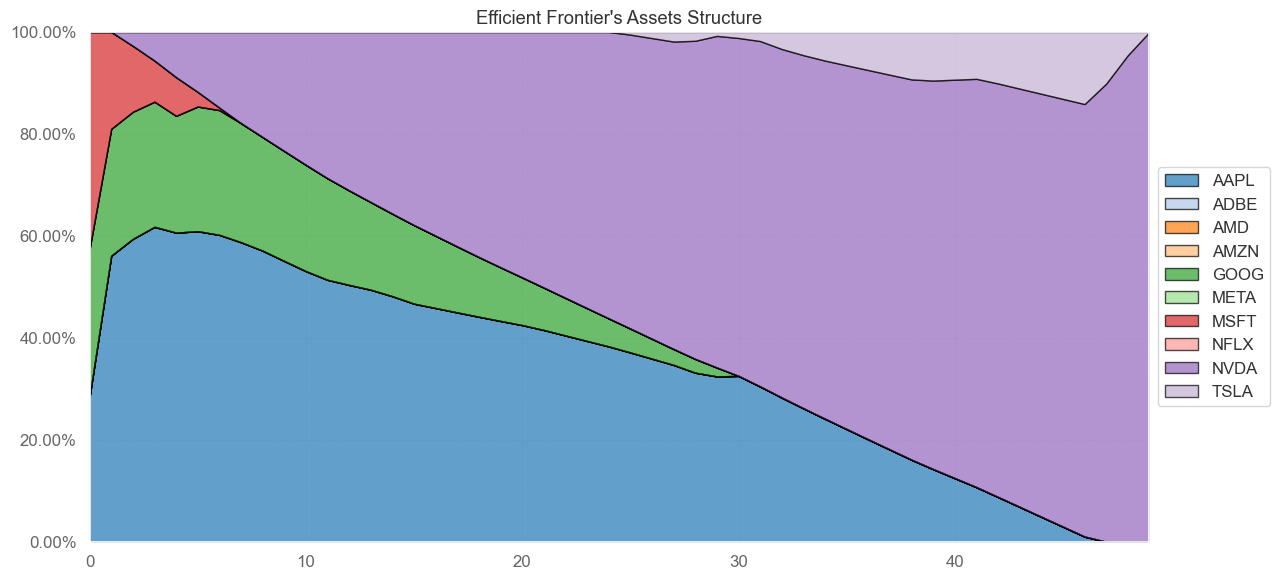

In [173]:
#plot Efficient Frontier Composition
ax=rp.plot_frontier_area(w_frontier=frontier, cmap='tab20', height=6, width=13, ax=None)